In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
#Important imports

In [2]:
data = pd.read_csv("/Data/cover_data.csv")

In [8]:
print(data.describe(),data.dtypes,data.head())
#In this we see statistics about the numerical data and a dtypes call to make sure there are no NaN entries.

           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       3

In [10]:
print(data.isna())

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           False   False  False                             False   
1           False   False  False                             False   
2           False   False  False                             False   
3           False   False  False                             False   
4           False   False  False                             False   
...           ...     ...    ...                               ...   
581007      False   False  False                             False   
581008      False   False  False                             False   
581009      False   False  False                             False   
581010      False   False  False                             False   
581011      False   False  False                             False   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                False                            False   
1        

In [78]:
print(data.columns[0:10])
#Selecting columns to normalise

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')


In [12]:
le = LabelEncoder()

In [13]:
data['labels'] = le.fit_transform(data['class'])
#Encodes labels 1-7 as 0-6.

In [16]:
print(data['labels'].describe())

count    581012.000000
mean          1.051471
std           1.396504
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: labels, dtype: float64


[0, 1, 2, 3, 4, 5, 6]
[211840, 283301, 35754, 2747, 9493, 17367, 20510]


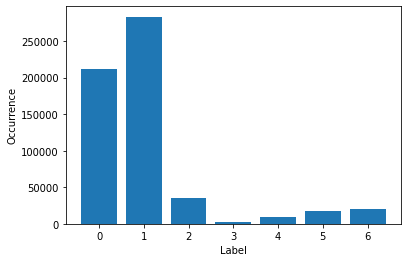

In [73]:
x = sorted(np.array(data['labels'].unique()))
print(x)
li = list(data['labels'].value_counts().sort_index())
print(li)
plt.bar(x,height=li)
plt.xlabel("Label")
plt.ylabel("Occurrence")
plt.show()
#Shows the proportions of occurences of each of the labels. 0 and 1 dominate.

In [79]:
columns_to_transform = data.columns[0:10]

In [84]:
std_sclr = StandardScaler()

In [85]:
data[columns_to_transform] = std_sclr.fit_transform(data[columns_to_transform])
#Here I scale the columns according to Z-score normalisation.

In [93]:
features = data.drop(columns = ['class','labels'])

In [94]:
labels = data['labels']

In [95]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)
#Doing a 4:1 train test split.

In [102]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(features_train, labels_train)
predictions = KNN_model.predict(features_test)
print(predictions)
#Fitting a K-Nearest Neighbours model to the data.

[0 1 1 ... 1 1 6]


In [103]:
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     42557
           1       0.93      0.95      0.94     56500
           2       0.90      0.92      0.91      7121
           3       0.85      0.73      0.78       526
           4       0.84      0.76      0.80      1995
           5       0.84      0.81      0.82      3489
           6       0.94      0.94      0.94      4015

    accuracy                           0.93    116203
   macro avg       0.89      0.86      0.87    116203
weighted avg       0.93      0.93      0.93    116203



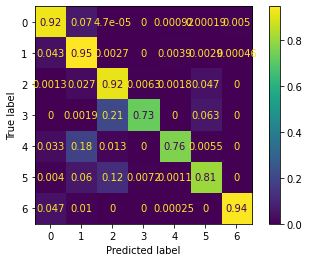

In [108]:
cm = confusion_matrix(labels_test,predictions, normalize='true')
disp = ConfusionMatrixDisplay(cm,display_labels=x)
disp.plot()
#Confusion matrix and classification report act as the evaluation metrics for the effectiveness of the model.

In [110]:
RF_model = RandomForestClassifier(n_estimators=10)
RF_model.fit(features_train,labels_train)
RF_predictions = RF_model.predict(features_test)
print(RF_predictions)
#Here I use a random froest consisting of 10 trees.

[0 1 1 ... 1 1 6]


In [111]:
print(classification_report(labels_test, RF_predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     42557
           1       0.94      0.95      0.95     56500
           2       0.93      0.95      0.94      7121
           3       0.90      0.81      0.85       526
           4       0.93      0.72      0.82      1995
           5       0.92      0.85      0.88      3489
           6       0.97      0.93      0.95      4015

    accuracy                           0.94    116203
   macro avg       0.93      0.88      0.90    116203
weighted avg       0.94      0.94      0.94    116203



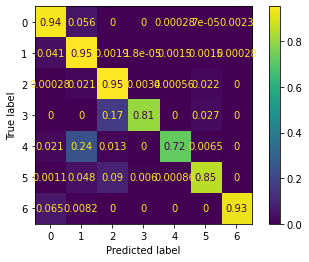

In [112]:
cm1 = confusion_matrix(labels_test, RF_predictions,normalize='true')
disp1 = ConfusionMatrixDisplay(cm1, display_labels=x)
disp1.plot()

In [ ]:
#The random forest has the highest F1-Score out of the tested models.